In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor


In [18]:
df_modeling = pd.read_csv(filepath_or_buffer= "../data/Dataset_for_modeling.csv") 
df_modeling.head()

,Rating,Rating Count,Free,Price,Ad Supported,In App Purchases,Editors Choice,Category_Arcade,Category_Books & Reference,Category_Business,...,Category_Productivity,Category_Puzzle,Category_Shopping,Category_Social,Category_Sports,Category_Tools,Category_Travel & Local,Category_other,Content_Rating_Everyone,Content_Rating_Not for Everyone
0,3.9,68.0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.0,0.0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,4.3,918.0,1,0.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,5.0,6.0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4.3,830.0,1,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Train-Test-Split

In [19]:
X = df_modeling.drop(columns= 'Rating')
y = df_modeling['Rating']

In [20]:
X.shape

(9663, 29)

In [21]:
y.shape

(9663,)

In [22]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size= 0.2, random_state = 1234)

In [23]:
lr_scaler = StandardScaler()
X_train_s = lr_scaler.fit_transform(X_train)
X_test_s = lr_scaler.transform(X_test)

In [24]:
lr_model = LinearRegression() 
lr_model.fit(X_train_s, y_train)
lr_model.score(X_train_s, y_train)

0.06634019787289747

In [25]:
lr_model.score(X_test_s, y_test)

-2045132947542293.5

We can see that the score are very small showing that the model does not fit the database. 

In [26]:
X_train_col = X_train.columns
X_train_col

Index(['Rating Count', 'Free', 'Price', 'Ad Supported', 'In App Purchases',
       'Editors Choice', 'Category_Arcade', 'Category_Books & Reference',
       'Category_Business', 'Category_Casual', 'Category_Communication',
       'Category_Education', 'Category_Entertainment', 'Category_Finance',
       'Category_Food & Drink', 'Category_Health & Fitness',
       'Category_Lifestyle', 'Category_Music & Audio',
       'Category_Personalization', 'Category_Productivity', 'Category_Puzzle',
       'Category_Shopping', 'Category_Social', 'Category_Sports',
       'Category_Tools', 'Category_Travel & Local', 'Category_other',
       'Content_Rating_Everyone', 'Content_Rating_Not for Everyone'],
      dtype='object')

In [27]:
coef_col = lr_model.coef_


In [28]:
coef_col

array([ 7.12675482e-02, -7.08786356e-02, -3.48235052e-02,  2.44840078e-01,
        2.67179546e-01,  4.18806743e+09, -2.33864028e+12, -3.35947778e+12,
       -3.70769532e+12, -2.24242059e+12, -2.18920772e+12, -4.74194042e+12,
       -3.72221460e+12, -2.41258763e+12, -2.69669364e+12, -2.75478351e+12,
       -3.35535172e+12, -4.06972956e+12, -2.92601373e+12, -2.74432624e+12,
       -2.30705614e+12, -2.70736138e+12, -2.27498980e+12, -2.16888605e+12,
       -3.73305581e+12, -2.59843836e+12, -5.94153148e+12, -4.18409865e+12,
       -4.18409865e+12])

In [29]:
pd.DataFrame( coef_col,X_train_col)

,0
Rating Count,7.126755e-02
Free,-7.087864e-02
Price,-3.482351e-02
Ad Supported,2.448401e-01
In App Purchases,2.671795e-01
Editors Choice,4.188067e+09
Category_Arcade,-2.338640e+12
Category_Books & Reference,-3.359478e+12
Category_Business,-3.707695e+12
Category_Casual,-2.242421e+12


In [30]:
DTR_model = DecisionTreeRegressor(random_state = 1234, max_depth = 3)
DTR_model.fit(X_train_s, y_train)
DTR_model.score(X_train_s, y_train)

0.9439536186586199

In [31]:
DTR_model.score(X_test_s, y_test)

0.9471222271304011

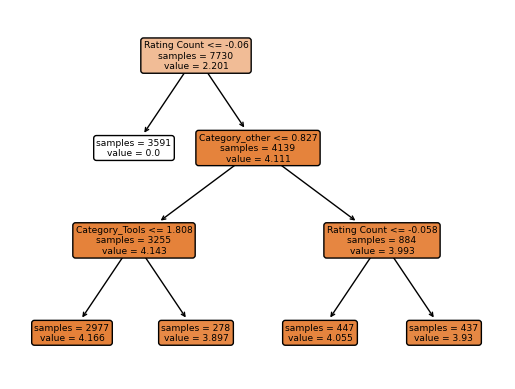

In [32]:
from sklearn.tree import plot_tree
plot_tree(DTR_model,
            feature_names = list(X.columns),
            rounded = True,
            impurity = False,
            filled = True);
            